In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [29]:
df = pd.read_csv('/Users/harshitgupta/Desktop/vs /VS-Data-Den/model_training/regional_master_50000009.csv',index_col='YEARWEEK',parse_dates=True)
# df.index.freq='MS'

In [30]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,1721999
2018-01-08,902891
2018-01-15,1046163
2018-01-22,876159
2018-01-29,1161595


<Axes: xlabel='YEARWEEK'>

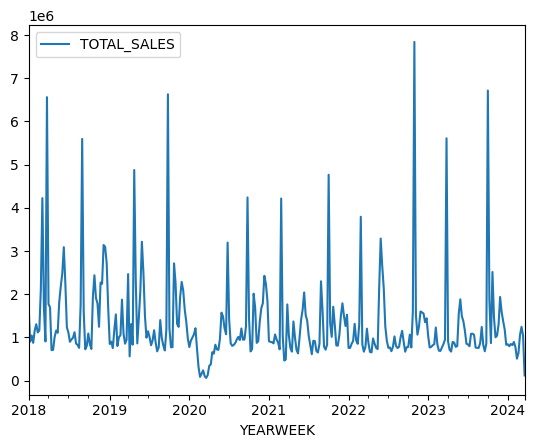

In [31]:
df.plot()

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose


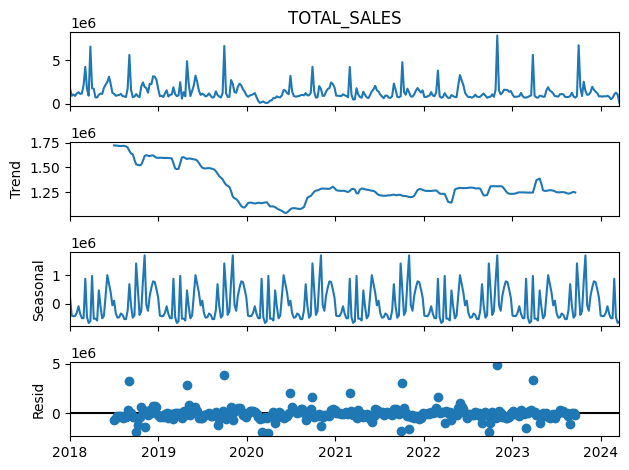

In [33]:
ANNUAL_PERIOD = 365*24
mult_decomp = seasonal_decompose(df['TOTAL_SALES'])
mult_decomp.plot()
plt.show()

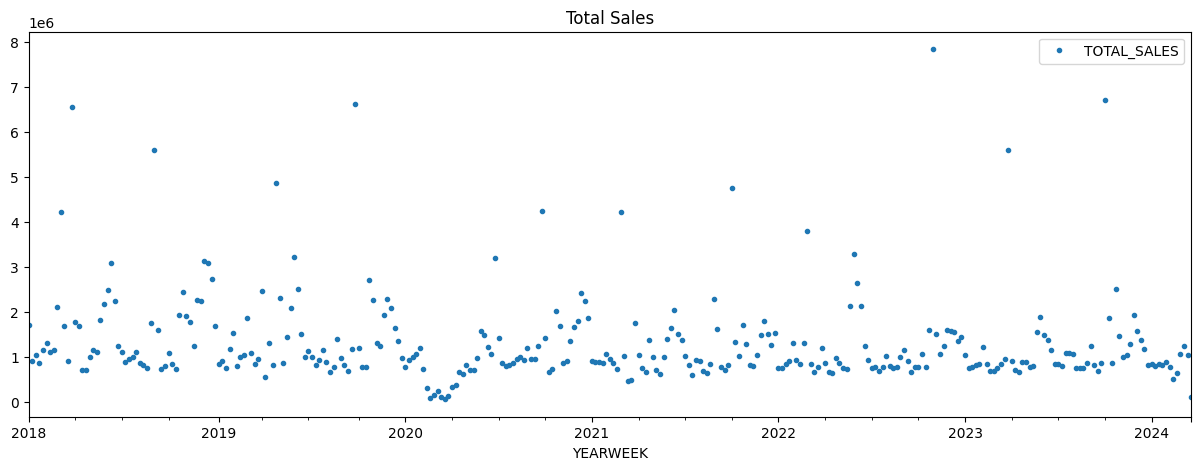

In [34]:

color_pal = sns.color_palette()
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Total Sales')
plt.show()

In [35]:
df['YEAR'] = df.index.year
df['MONTH'] = df.index.month
df['DAY'] = df.index.day
df['DAY_OF_WEEK'] = df.index.dayofweek
df['WEEK_OF_YEAR'] = df.index.isocalendar().week


In [36]:
train = df.iloc[:int(0.6*len(df))]
test = df.iloc[int(0.6*len(df)):]


In [37]:
features = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'WEEK_OF_YEAR']
target = 'TOTAL_SALES'


In [38]:
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [39]:
X_train.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,WEEK_OF_YEAR
YEARWEEK,,,,,
2018-01-01,2018,1,1,0,1
2018-01-08,2018,1,8,0,2
2018-01-15,2018,1,15,0,3
2018-01-22,2018,1,22,0,4
2018-01-29,2018,1,29,0,5


In [40]:
y_test.tail()

YEARWEEK
2024-02-19     640202
2024-02-26    1060437
2024-03-04    1247705
2024-03-11    1042492
2024-03-18     120695
Name: TOTAL_SALES, dtype: int64

In [41]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
xg_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
# model = xgb.XGBRegressor(X_train, y_train, X_test, y_test)

In [43]:
# results = model.fit()

In [44]:
y_pred_train = xg_reg.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

In [45]:
y_pred_test = xg_reg.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [46]:
train_rmse , test_rmse

(1748.9155205888092, 1077730.0951269052)

In [47]:
predictions = pd.DataFrame({'Date': test.index, 'Actual_Sales': y_test, 'Predicted_Sales': y_pred_test})

In [48]:
predictions

,Date,Actual_Sales,Predicted_Sales
YEARWEEK,,,
2021-09-27,2021-09-27,835136,4.026606e+06
2021-10-04,2021-10-04,4765110,1.450369e+06
2021-10-11,2021-10-11,1326006,7.872045e+05
2021-10-18,2021-10-18,1013609,7.717858e+05
2021-10-25,2021-10-25,1711620,1.103348e+06
...,...,...,...
2024-02-19,2024-02-19,640202,7.396099e+05
2024-02-26,2024-02-26,1060437,1.495898e+06
2024-03-04,2024-03-04,1247705,1.435882e+06


In [49]:
# test['prediction'] = xg_reg.predict(X_test)

# df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# df.tail(2)

In [50]:

# ax = df[['TOTAL_SALES']].plot(figsize=(15, 5))

# df['prediction'].plot(ax=ax, style='.')
# plt.legend(['Ground Truth Data', 'Predictions'])
# ax.set_title('Actual Past Data and Prediction')
# plt.show()

In [51]:
combined_data = pd.concat([train, test])


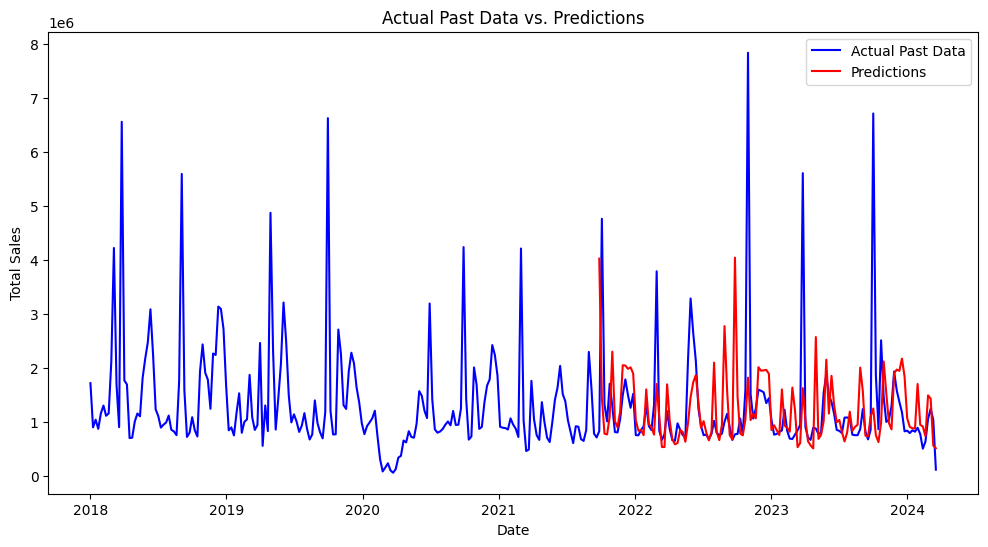

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['TOTAL_SALES'], label='Actual Past Data', color='blue')
plt.plot(test.index, y_pred_test, label='Predictions', color='red')
plt.title('Actual Past Data vs. Predictions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [53]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [54]:
rmse

1077730.0951269052